In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data1 = pd.read_pickle('Finish_I7000_F6000_D3_500_I_F_PKL.pkl')

data2 = pd.read_pickle('Finish_I7000_F6000_D3_500_I_F_PKL_Prediction.pkl')
data2
#df =  pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/Finish_D2_I7000_F9000/TPath_500_finish_data_D2.pkl')

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur,Vorhergesagt
1037169,0.00000,-0.00200,500,7000,6000,811.76,801.424744
1037170,0.00000,-0.00196,500,7000,6000,853.27,843.035217
1037171,0.00000,-0.00192,500,7000,6000,897.57,885.222107
1037172,0.00000,-0.00188,500,7000,6000,941.21,931.755859
1037173,0.00000,-0.00184,500,7000,6000,986.34,978.319458
...,...,...,...,...,...,...,...
1043527,0.00248,0.00184,500,7000,6000,784.55,774.850220
1043528,0.00248,0.00188,500,7000,6000,745.87,733.308289
1043529,0.00248,0.00192,500,7000,6000,706.17,698.034851
1043530,0.00248,0.00196,500,7000,6000,693.28,677.646179


In [3]:
bedingung = data1['Temperatur'] > 1810
print(data1[bedingung].describe())

       X-Koordinate  Y-Koordinate  Zeitpunkt   Strom   Kraft   Temperatur
count   1562.000000   1562.000000     1562.0  1562.0  1562.0  1562.000000
mean       0.000811     -0.000068      500.0  7000.0  6000.0  1906.238284
std        0.000511      0.000408        0.0     0.0     0.0    54.625294
min        0.000000     -0.000840      500.0  7000.0  6000.0  1810.100000
25%        0.000360     -0.000400      500.0  7000.0  6000.0  1859.050000
50%        0.000760     -0.000080      500.0  7000.0  6000.0  1907.150000
75%        0.001240      0.000280      500.0  7000.0  6000.0  1953.775000
max        0.001880      0.000720      500.0  7000.0  6000.0  1998.400000


In [4]:
bedingung = data2['Temperatur'] > 1810
print(data1[bedingung].describe())

       X-Koordinate  Y-Koordinate  Zeitpunkt   Strom   Kraft   Temperatur
count   1562.000000   1562.000000     1562.0  1562.0  1562.0  1562.000000
mean       0.000811     -0.000068      500.0  7000.0  6000.0  1906.238284
std        0.000511      0.000408        0.0     0.0     0.0    54.625294
min        0.000000     -0.000840      500.0  7000.0  6000.0  1810.100000
25%        0.000360     -0.000400      500.0  7000.0  6000.0  1859.050000
50%        0.000760     -0.000080      500.0  7000.0  6000.0  1907.150000
75%        0.001240      0.000280      500.0  7000.0  6000.0  1953.775000
max        0.001880      0.000720      500.0  7000.0  6000.0  1998.400000


In [5]:
# data['Differenz'] = data['Temperatur'] - data['Vorhergesagt']
# data

In [6]:
df_true = data1.drop(data1.columns[2:5], axis=1)
df_prediction = data2.drop(data2.columns[2:5], axis=1)

In [7]:
import matplotlib.pyplot as plt

x = df['X-Koordinate']*10000
y = df['Y-Koordinate']*10000  # Y-Koordinaten
temperature = df['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', alpha=0.5, s=40, marker='s')  # 's' für Quadrate
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate (mm)')
plt.ylabel('Y-Koordinate (mm)')
plt.title('Temperaturverteilung nach Koordinaten (500 ms, 7000 A, 9000 N)')
plt.grid(False)  # Gitterlinien ausblenden
plt.savefig('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Bilder Diplomarbeit/D2_I7000_F9000_Original.png', dpi=300,bbox_inches='tight')
plt.show()


NameError: name 'df' is not defined

C:\Users\erikm\AppData\Local\Temp\ipykernel_11124\3262258684.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


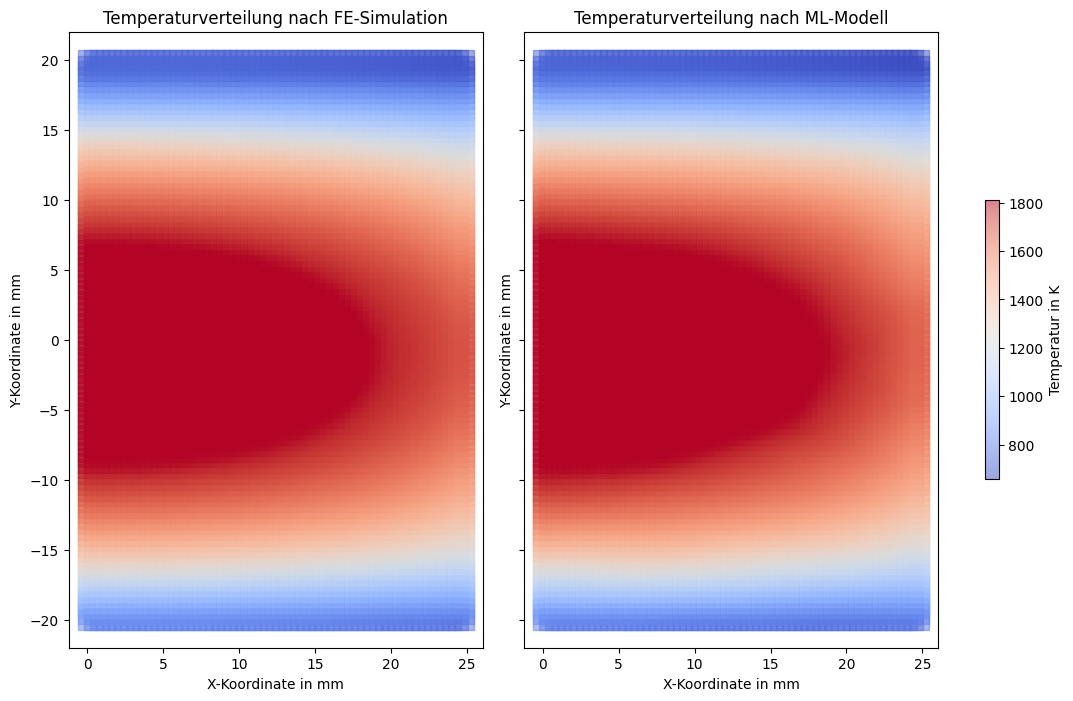

In [14]:
import matplotlib.pyplot as plt

# Daten vorbereiten
x_true = df_true['X-Koordinate'] *10000
y_true = df_true['Y-Koordinate'] *10000
temperature_true = df_true['Temperatur']

x_pred = df_prediction['X-Koordinate'] *10000
y_pred = df_prediction['Y-Koordinate'] *10000
temperature_pred = df_prediction['Vorhergesagt']

# Minima und Maxima der Temperaturen ermitteln, um die Farbskala anzupassen
min_temp = min(temperature_true.min(), temperature_pred.min())
max_temp = 1810#max(temperature_true.max(), temperature_pred.max())

# Plots erstellen
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'wspace': 0.1, 'hspace': 0.3})

# Wahrer Zustand
sc1 = axs[0].scatter(x_true, y_true, c=temperature_true, cmap='coolwarm', alpha=0.5, s=200, marker='s', vmin=min_temp, vmax=max_temp)
axs[0].set_title('Temperaturverteilung nach FE-Simulation')
axs[0].set_xlabel('X-Koordinate in mm')
axs[0].set_ylabel('Y-Koordinate in mm')

# Vorhergesagter Zustand
sc2 = axs[1].scatter(x_pred, y_pred, c=temperature_pred, cmap='coolwarm', alpha=0.5, s=200, marker='s', vmin=min_temp, vmax=max_temp)
axs[1].set_title('Temperaturverteilung nach ML-Modell')
axs[1].set_xlabel('X-Koordinate in mm')
axs[1].set_ylabel('Y-Koordinate in mm')

# Farblegende hinzufügen
# Hier legen wir die Position der Colorbar rechts neben den Plots fest
cbar = fig.colorbar(sc2, ax=axs.ravel().tolist(), orientation='vertical', fraction=0.015, pad=0.05)
cbar.set_label('Temperatur in K')

# Gitterlinien ausblenden
axs[0].grid(False)
axs[1].grid(False)

plt.tight_layout()
plt.savefig('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Bilder Diplomarbeit/D3_I7000_F6000_Comparison.png', dpi = 300)
plt.show()


C:\Users\erikm\AppData\Local\Temp\ipykernel_19156\1150730069.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


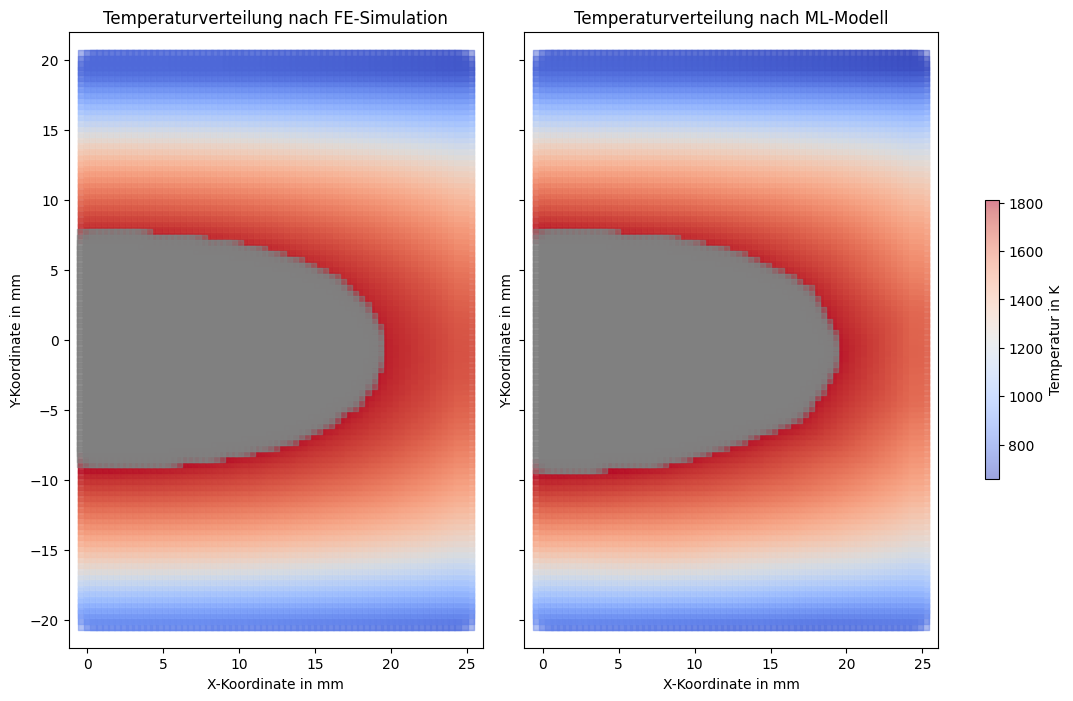

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Daten vorbereiten (Beispieldaten)
# Daten vorbereiten
x_true = df_true['X-Koordinate'] *10000
y_true = df_true['Y-Koordinate'] *10000
temperature_true = df_true['Temperatur']

x_pred = df_prediction['X-Koordinate'] *10000
y_pred = df_prediction['Y-Koordinate'] *10000
temperature_pred = df_prediction['Vorhergesagt']

# Minima und Maxima der Temperaturen ermitteln, um die Farbskala anzupassen
min_temp = min(min(temperature_true), min(temperature_pred))
max_temp = 1810

# Schwellenwert festlegen
threshold = max_temp

# Plots erstellen
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'wspace': 0.1, 'hspace': 0.3})

# Funktion zum Zeichnen der Datenpunkte mit Überhöhungsfarbe
def draw_scatter(ax, x, y, temperature, title):
    # Datenpunkte unterhalb des Schwellenwerts
    mask_below = temperature <= threshold
    sc = ax.scatter(x[mask_below], y[mask_below], c=temperature[mask_below], cmap='coolwarm', alpha=0.5, s=200, marker='s', vmin=min_temp, vmax=max_temp)
    
    # Datenpunkte oberhalb des Schwellenwerts
    mask_above = temperature > threshold
    ax.scatter(x[mask_above], y[mask_above], color='grey', alpha=0.5, s=200, marker='s')  
    
    ax.set_title(title)
    ax.set_xlabel('X-Koordinate in mm')
    ax.set_ylabel('Y-Koordinate in mm')
    return sc

# Echte Temperaturverteilung
sc1 = draw_scatter(axs[0], x_true, y_true, temperature_true, 'Temperaturverteilung nach FE-Simulation')

# Vorhergesagte Temperaturverteilung
sc2 = draw_scatter(axs[1], x_pred, y_pred, temperature_pred, 'Temperaturverteilung nach ML-Modell')

# Farblegende hinzufügen
cbar = fig.colorbar(sc2, ax=axs.ravel().tolist(), orientation='vertical', fraction=0.015, pad=0.05)
cbar.set_label('Temperatur in K')

# Gitterlinien ausblenden
axs[0].grid(False)
axs[1].grid(False)
# plt.xlabel('X-Koordinate in mm')
# plt.ylabel('Y-Koordinate in mm')

plt.tight_layout()
plt.savefig('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Bilder Diplomarbeit/D3_I7000_F6000_Comparison_mitLinse.png', dpi=300)
plt.show()


In [16]:
data2['Differenz'] = abs(data2['Temperatur']- data2['Vorhergesagt'])
data2

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur,Vorhergesagt,Differenz
1037169,0.00000,-0.00200,500,7000,6000,811.76,801.424744,10.335256
1037170,0.00000,-0.00196,500,7000,6000,853.27,843.035217,10.234783
1037171,0.00000,-0.00192,500,7000,6000,897.57,885.222107,12.347893
1037172,0.00000,-0.00188,500,7000,6000,941.21,931.755859,9.454141
1037173,0.00000,-0.00184,500,7000,6000,986.34,978.319458,8.020542
...,...,...,...,...,...,...,...,...
1043527,0.00248,0.00184,500,7000,6000,784.55,774.850220,9.699780
1043528,0.00248,0.00188,500,7000,6000,745.87,733.308289,12.561711
1043529,0.00248,0.00192,500,7000,6000,706.17,698.034851,8.135149
1043530,0.00248,0.00196,500,7000,6000,693.28,677.646179,15.633821


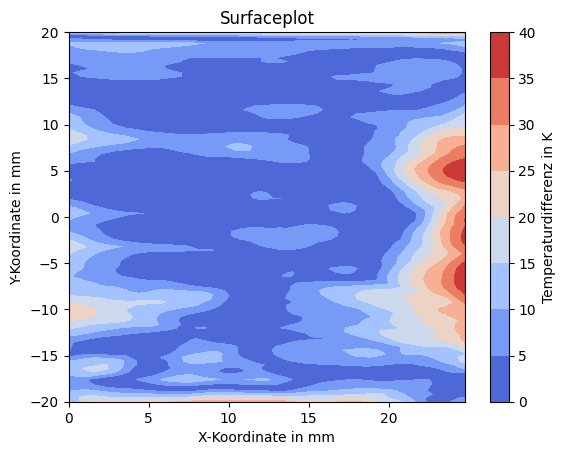

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#data2['Differenz'] = data2['Differenz']

# Daten aus dem DataFrame extrahieren
x = data2['X-Koordinate'].values * 10000  # Werte für die X-Achse
y = data2['Y-Koordinate'].values * 10000 # Werte für die Y-Achse
z = data2['Differenz'].values  # Z-Werte als Funktion von x und y

# Reshape der Daten für den Surface Plot
x = x.reshape((len(np.unique(x)), len(np.unique(y))))
y = y.reshape((len(np.unique(x)), len(np.unique(y))))
z = z.reshape((len(np.unique(x)), len(np.unique(y))))
# Erstellen des Contour Plots
plt.figure()  # Größe des Plots manuell einstellen (10 Zoll breit, 8 Zoll hoch)

contour = plt.contourf(x, y, z, cmap=cm.coolwarm)

# Beschriftungen und Titel hinzufügen
plt.xlabel('X-Koordinate in mm')
plt.ylabel('Y-Koordinate in mm')
plt.title('Surfaceplot')


# Farbleiste hinzufügen
bar = plt.colorbar(contour)
bar.set_label('Temperaturdifferenz in K')
plt.savefig('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Bilder Diplomarbeit/Surfaceplot_D3_I7000_F6000.png', dpi=300)
# Anzeigen des Contour Plots
plt.show()


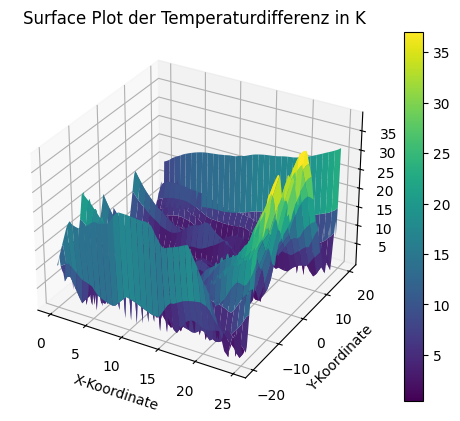

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Erstellen des Surface Plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Beschriftungen und Titel hinzufügen
ax.set_xlabel('X-Koordinate')
ax.set_ylabel('Y-Koordinate')
ax.set_zlabel('Differenz')
ax.set_title('Surface Plot der Temperaturdifferenz in K')

# Farbleiste hinzufügen
fig.colorbar(surf)

# Anzeigen des Surface Plots
plt.show()
